In [1]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']
X = data
y = labels

# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

Initializing an AdaBoost Classifier

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
y_train_pred = clf.predict(X_train)

print (accuracy_score(y_pred, y_valid))

0.896551724138


What about a Decision Tree Classifier with default parameters?

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
y_train_pred = clf.predict(X_train)

print (accuracy_score(y_pred, y_valid))

0.896551724138


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

best_acc = 0.0
best_max_depth = 0
best_n_est = 0

for max_depth in [1,2,3,4,5]:
    for n_est in [100,200,300,400,500]:
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                         n_estimators=n_est)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        y_train_pred = clf.predict(X_train)

        acc = accuracy_score(y_pred, y_valid)

        print ('Validation Accuracy = ' + str(acc) + ' at max_depth = ' + str(max_depth) + ' estimators = ' + str(n_est))
        if (acc > best_acc):
            best_acc = acc
            best_max_depth = max_depth
            best_n_est = n_est

print ('')
print ('Best params = ' + str(best_max_depth) + ' ' + str(best_n_est))

Validation Accuracy = 0.896551724138 at max_depth = 1 estimators = 100
Validation Accuracy = 0.896551724138 at max_depth = 1 estimators = 200
Validation Accuracy = 0.896551724138 at max_depth = 1 estimators = 300
Validation Accuracy = 0.896551724138 at max_depth = 1 estimators = 400
Validation Accuracy = 0.896551724138 at max_depth = 1 estimators = 500
Validation Accuracy = 1.0 at max_depth = 2 estimators = 100
Validation Accuracy = 1.0 at max_depth = 2 estimators = 200
Validation Accuracy = 0.965517241379 at max_depth = 2 estimators = 300
Validation Accuracy = 1.0 at max_depth = 2 estimators = 400
Validation Accuracy = 1.0 at max_depth = 2 estimators = 500
Validation Accuracy = 0.931034482759 at max_depth = 3 estimators = 100
Validation Accuracy = 0.965517241379 at max_depth = 3 estimators = 200
Validation Accuracy = 0.931034482759 at max_depth = 3 estimators = 300
Validation Accuracy = 0.931034482759 at max_depth = 3 estimators = 400
Validation Accuracy = 0.965517241379 at max_depth 

Single classifier with these parameters

In [5]:
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))

In [6]:
clf = DecisionTreeClassifier(max_depth=best_max_depth)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (accuracy_score(y_pred, y_test))

0.722222222222


Adaboost Classifier with 200 of these classifiers on TEST set

In [7]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth),
                         n_estimators=best_n_est)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (accuracy_score(y_pred, y_test))

0.972222222222


Decision Boundary

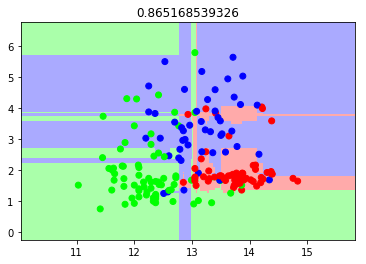

In [8]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.clf()
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth),
                         n_estimators=best_n_est)
clf.fit(X[:,:2], y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(accuracy_score(clf.predict(X[:,:2]), y))
plt.show()

Bagging

In [9]:
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']
X = data
y = labels

# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
from sklearn.ensemble import BaggingClassifier

In [11]:
clf = BaggingClassifier(n_estimators=10)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
y_true_preds = clf.predict(X_train)

print ('Test accuracy = ' + str(accuracy_score(preds, y_test)))
print ('Train accuracy = ' + str(accuracy_score(y_true_preds, y_train)))

Test accuracy = 0.944444444444
Train accuracy = 1.0


In [12]:
# Random in nature -> Different result each time possible

Random Forests

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
y_true_preds = clf.predict(X_train)

print ('Test accuracy = ' + str(accuracy_score(preds, y_test)))
print ('Train accuracy = ' + str(accuracy_score(y_true_preds, y_train)))

Test accuracy = 0.972222222222
Train accuracy = 1.0


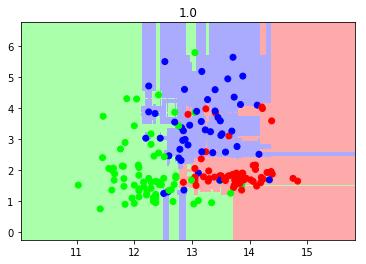

In [15]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.clf()
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X[:,:2], y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(accuracy_score(clf.predict(X[:,:2]), y))
plt.show()